In [ ]:
# Импорт библиотек
import numpy as np  #работа с массивами
import pandas as pd #работа с данными (таблицами)
import matplotlib.pyplot as plt #визуализация
import seaborn as sns #визуализация в статистике

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/X_bp.csv', delimiter=';',index_col=0)
df.head(5)

,Соотношение матрица-наполнитель,Плотность. кг/м3,модуль упругости. ГПа,Количество отвердителя. м.%,Содержание эпоксидных групп.%_2,Температура вспышки. С_2,Поверхностная плотность. г/м2,Модуль упругости при растяжении. ГПа,Прочность при растяжении. МПа,Потребление смолы. г/м2
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [ ]:
df.describe()

,Соотношение матрица-наполнитель,Плотность. кг/м3,модуль упругости. ГПа,Количество отвердителя. м.%,Содержание эпоксидных групп.%_2,Температура вспышки. С_2,Поверхностная плотность. г/м2,Модуль упругости при растяжении. ГПа,Прочность при растяжении. МПа,Потребление смолы. г/м2
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.389403,1731.764635,2.436909,17.740275,14.254986,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,2.317887,1924.155466,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


**Основная концепция:**
Данные в столбцах перемешены в случайном порядке не зависимо друг от друга.
Требуется сортировка даннных.

Сортировку будем проводить исходя из физики, механики и логики

Отсортируем по столбцу "Соотношение матрица-наполнитель"

In [ ]:
df_sort = df.sort_values('Соотношение матрица-наполнитель').reset_index(drop=True)
df_sort.head(5)

,Соотношение матрица-наполнитель,Плотность. кг/м3,модуль упругости. ГПа,Количество отвердителя. м.%,Содержание эпоксидных групп.%_2,Температура вспышки. С_2,Поверхностная плотность. г/м2,Модуль упругости при растяжении. ГПа,Прочность при растяжении. МПа,Потребление смолы. г/м2
0,0.389403,1917.699889,602.093245,93.346585,24.966084,218.303388,325.199965,71.693413,2453.290387,284.389049
1,0.463342,1925.610616,992.760436,88.383137,22.147630,160.255843,951.222629,76.210116,2781.540025,127.652751
2,0.547391,1931.739832,124.507732,121.151346,22.667522,277.948292,609.004377,76.072252,2486.698093,262.937031
3,0.551508,1934.555670,470.619154,119.503474,23.095187,332.123415,396.847568,73.797618,2687.995919,166.087942
4,0.596783,1930.389172,789.798256,64.812581,20.749293,264.844169,589.344541,78.598663,2051.958320,307.363639


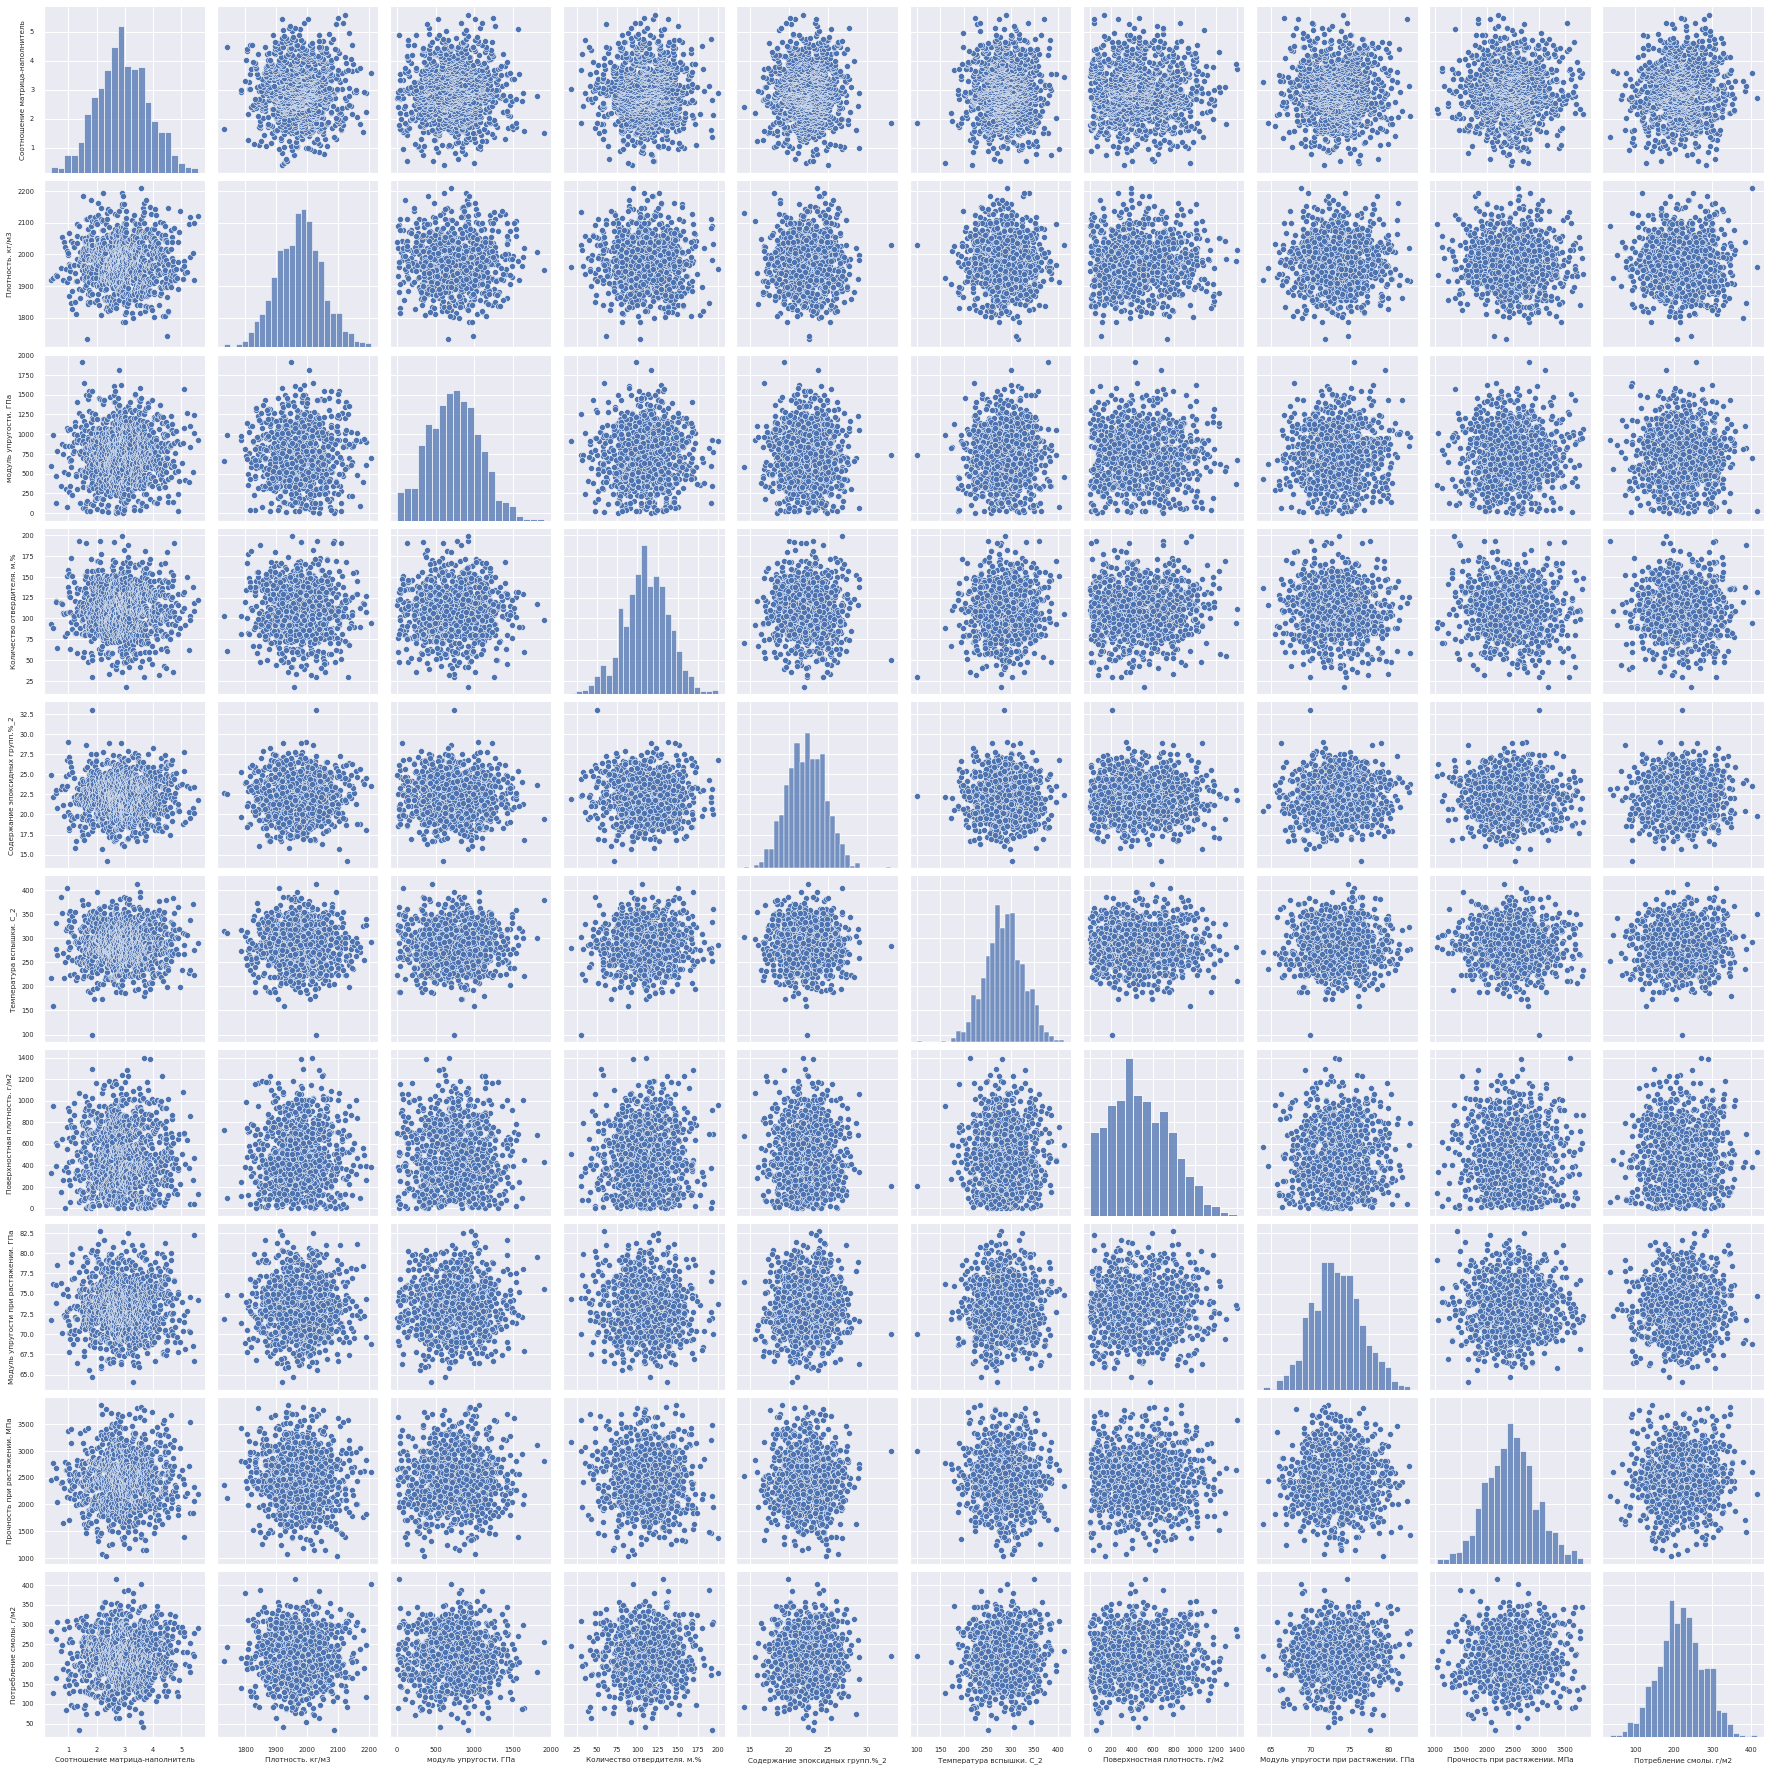

In [ ]:
sns.set(style = "darkgrid")
sns.set(font_scale=0.6)
sns.pairplot(df_sort)

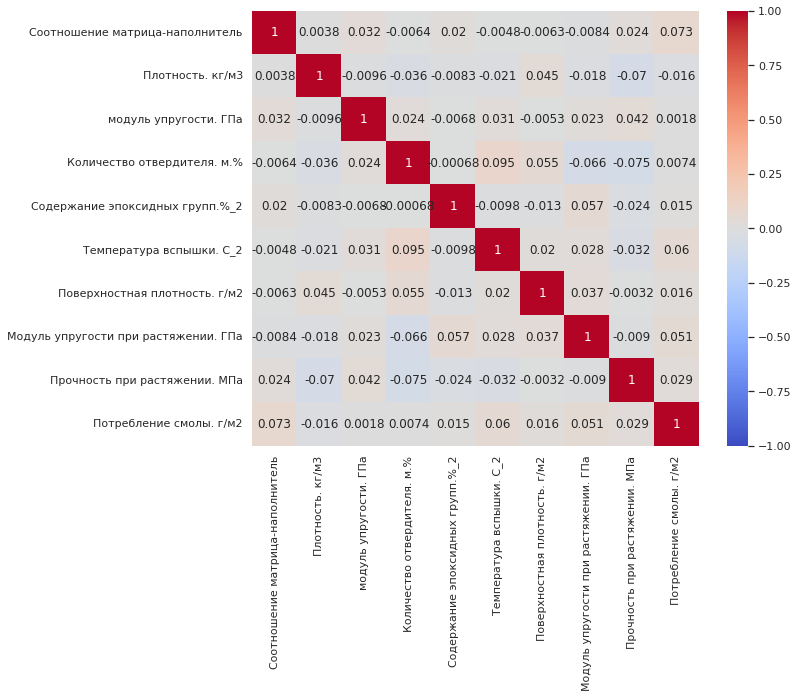

In [ ]:
sns.set(font_scale=1)
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=df_corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

Исходя из физики, механики и логики должны соблюдаться условия:

- чем больше соотношение матрица/наполнитель, тем больше в композите связующего, соответственно и больше потребление смолы. (условие не наблюдается)

- чем больше соотношение матрица/наполнитель, тем меньше плотность. В качестве связующего выступает эпоксидная смола (1250 кг/м3), а в качестве наполнителя больше подходит высокомодульное стекловолокно (2660 кг/м3). Другими словами, чем больше доля связующего с плотностью меньше наполнителя, тем плотность композита будет меньше. (условие не наблюдается)

- чем больше соотношение матрица/наполнитель, тем меньше Модуль упругости, модуль упругости на растяжение и прочность на растяжение (при условии растяжения вдоль волокон). Модуль упругости эпоксидной смолы 3-4.5 ГПа, высокомодульное стекло 86 ГПа. В столбце Модуль упругости некоректные значения: 1900ГПа нереально высокое значение (у стали 200ГПа для сравнения), возможно неправильные единицы измерения или что-то другое. (условие не наблюдается)

- чем больше плотность, тем больше и поверхностная плотность. (условие не наблюдается)

- с количеством отвердителя и содержанием эпоксидных групп менее понятно, но можно предположить, что чем больше потребление смолы, тем больше количество отвердителя и содержание эпоксидных групп.

- по температуре вспышке можно предположить, что чем больше смолы, тем ниже температура вспышки. (эпоксидная смола температура вспышки примерно 150 градусов, стекловолокно не меньше 1200 градусов)

Соответственно из вышеизложенных условий, делаем вывод, что данные в переменных случайным образом были перемешены независимо друг от друга.

Произведем преобразования:

- Соотношение матрица/наполнитель: сортировка по возврастанию

- Плотность: сортировка по убыванию

- Модуль упругости: удалим столбец в связи некоректными данными

- Количество отвердителя: сортировка по возврастанию

- Содержание эпоксидных групп: сортировка по возврастанию

- Температура вспышки: сортировка по убыванию

- Поверхностная плотность: сортировка по убыванию

- Модуль упругости при растяжении: сортировка по убыванию

- Прочность при растяжении: сортировка по убыванию

- Потребление смолы: сортировка по возврастанию

In [ ]:
# удаляем столбец: модуль упругости. ГПа
df_sort = df_sort.drop(columns=['модуль упругости. ГПа'])
df_sort.head(5)

,Соотношение матрица-наполнитель,Плотность. кг/м3,Количество отвердителя. м.%,Содержание эпоксидных групп.%_2,Температура вспышки. С_2,Поверхностная плотность. г/м2,Модуль упругости при растяжении. ГПа,Прочность при растяжении. МПа,Потребление смолы. г/м2
0,0.389403,1917.699889,93.346585,24.966084,218.303388,325.199965,71.693413,2453.290387,284.389049
1,0.463342,1925.610616,88.383137,22.147630,160.255843,951.222629,76.210116,2781.540025,127.652751
2,0.547391,1931.739832,121.151346,22.667522,277.948292,609.004377,76.072252,2486.698093,262.937031
3,0.551508,1934.555670,119.503474,23.095187,332.123415,396.847568,73.797618,2687.995919,166.087942
4,0.596783,1930.389172,64.812581,20.749293,264.844169,589.344541,78.598663,2051.958320,307.363639


In [ ]:
# независимая сортировка
df_sort[['Плотность. кг/м3']] = df_sort[['Плотность. кг/м3']].sort_values(by ='Плотность. кг/м3',ascending=[False]).reset_index(drop=True)
df_sort[['Количество отвердителя. м.%']] = df_sort[['Количество отвердителя. м.%']].sort_values(by ='Количество отвердителя. м.%').reset_index(drop=True)
df_sort[['Содержание эпоксидных групп.%_2']] = df_sort[['Содержание эпоксидных групп.%_2']].sort_values(by ='Содержание эпоксидных групп.%_2').reset_index(drop=True)
df_sort[['Температура вспышки. С_2']] = df_sort[['Температура вспышки. С_2']].sort_values(by ='Температура вспышки. С_2').reset_index(drop=True)
df_sort[['Поверхностная плотность. г/м2']] = df_sort[['Поверхностная плотность. г/м2']].sort_values(by ='Поверхностная плотность. г/м2',ascending=[False]).reset_index(drop=True)
df_sort[['Модуль упругости при растяжении. ГПа']] = df_sort[['Модуль упругости при растяжении. ГПа']].sort_values(by ='Модуль упругости при растяжении. ГПа',ascending=[False]).reset_index(drop=True)
df_sort[['Прочность при растяжении. МПа']] = df_sort[['Прочность при растяжении. МПа']].sort_values(by ='Прочность при растяжении. МПа',ascending=[False]).reset_index(drop=True)
df_sort[['Потребление смолы. г/м2']] = df_sort[['Потребление смолы. г/м2']].sort_values(by ='Потребление смолы. г/м2').reset_index(drop=True)
df_sort.head()

,Соотношение матрица-наполнитель,Плотность. кг/м3,Количество отвердителя. м.%,Содержание эпоксидных групп.%_2,Температура вспышки. С_2,Поверхностная плотность. г/м2,Модуль упругости при растяжении. ГПа,Прочность при растяжении. МПа,Потребление смолы. г/м2
0,0.389403,2207.773481,17.740275,14.254986,100.000000,1399.542362,82.682051,3848.436732,33.803026
1,0.463342,2192.738783,29.956150,15.695894,160.255843,1391.032409,82.525773,3817.269484,41.048278
2,0.547391,2192.297637,30.000000,15.881668,173.484920,1291.340115,82.237600,3791.072810,53.548916
3,0.551508,2184.493200,32.019222,16.048978,173.973907,1288.691844,81.594750,3773.151949,63.685698
4,0.596783,2182.751822,33.624187,16.391595,179.374391,1238.476416,81.417126,3763.445179,64.524180


Можно проверить по теоритической формуле расчета плотности композита, исходя из объемных долей матрицы и наполнителя.

В первой строке наименьшее содержание смолы и соответственно наибольшая плотность.

Формула для расчета:

**Ro_comp = Ro_n * nu_n + Ro_m * nu_m**

Ro_comp - плотность композита

Ro_n - плотность наполнителя

Ro_m - плотность матрицы

nu_n - объемная доля наполнителя

nu_m - объемная доля матрицы

Для первой строки отсортированного датасета Соотношение матрица/наполнитель или **nu_m/nu_n = 0.389403**,

при этом **nu_m + nu_n = 1**

Соответственно **nu_m = 0.28027**, а **nu_n = 0.71973**

Тогда плотность композита **Ro_comp = 2660  * 0.71973 + 1250 * 0.28027 = 2264,8193**

При табличном значении **2207.7734**, вполне похоже на правду.

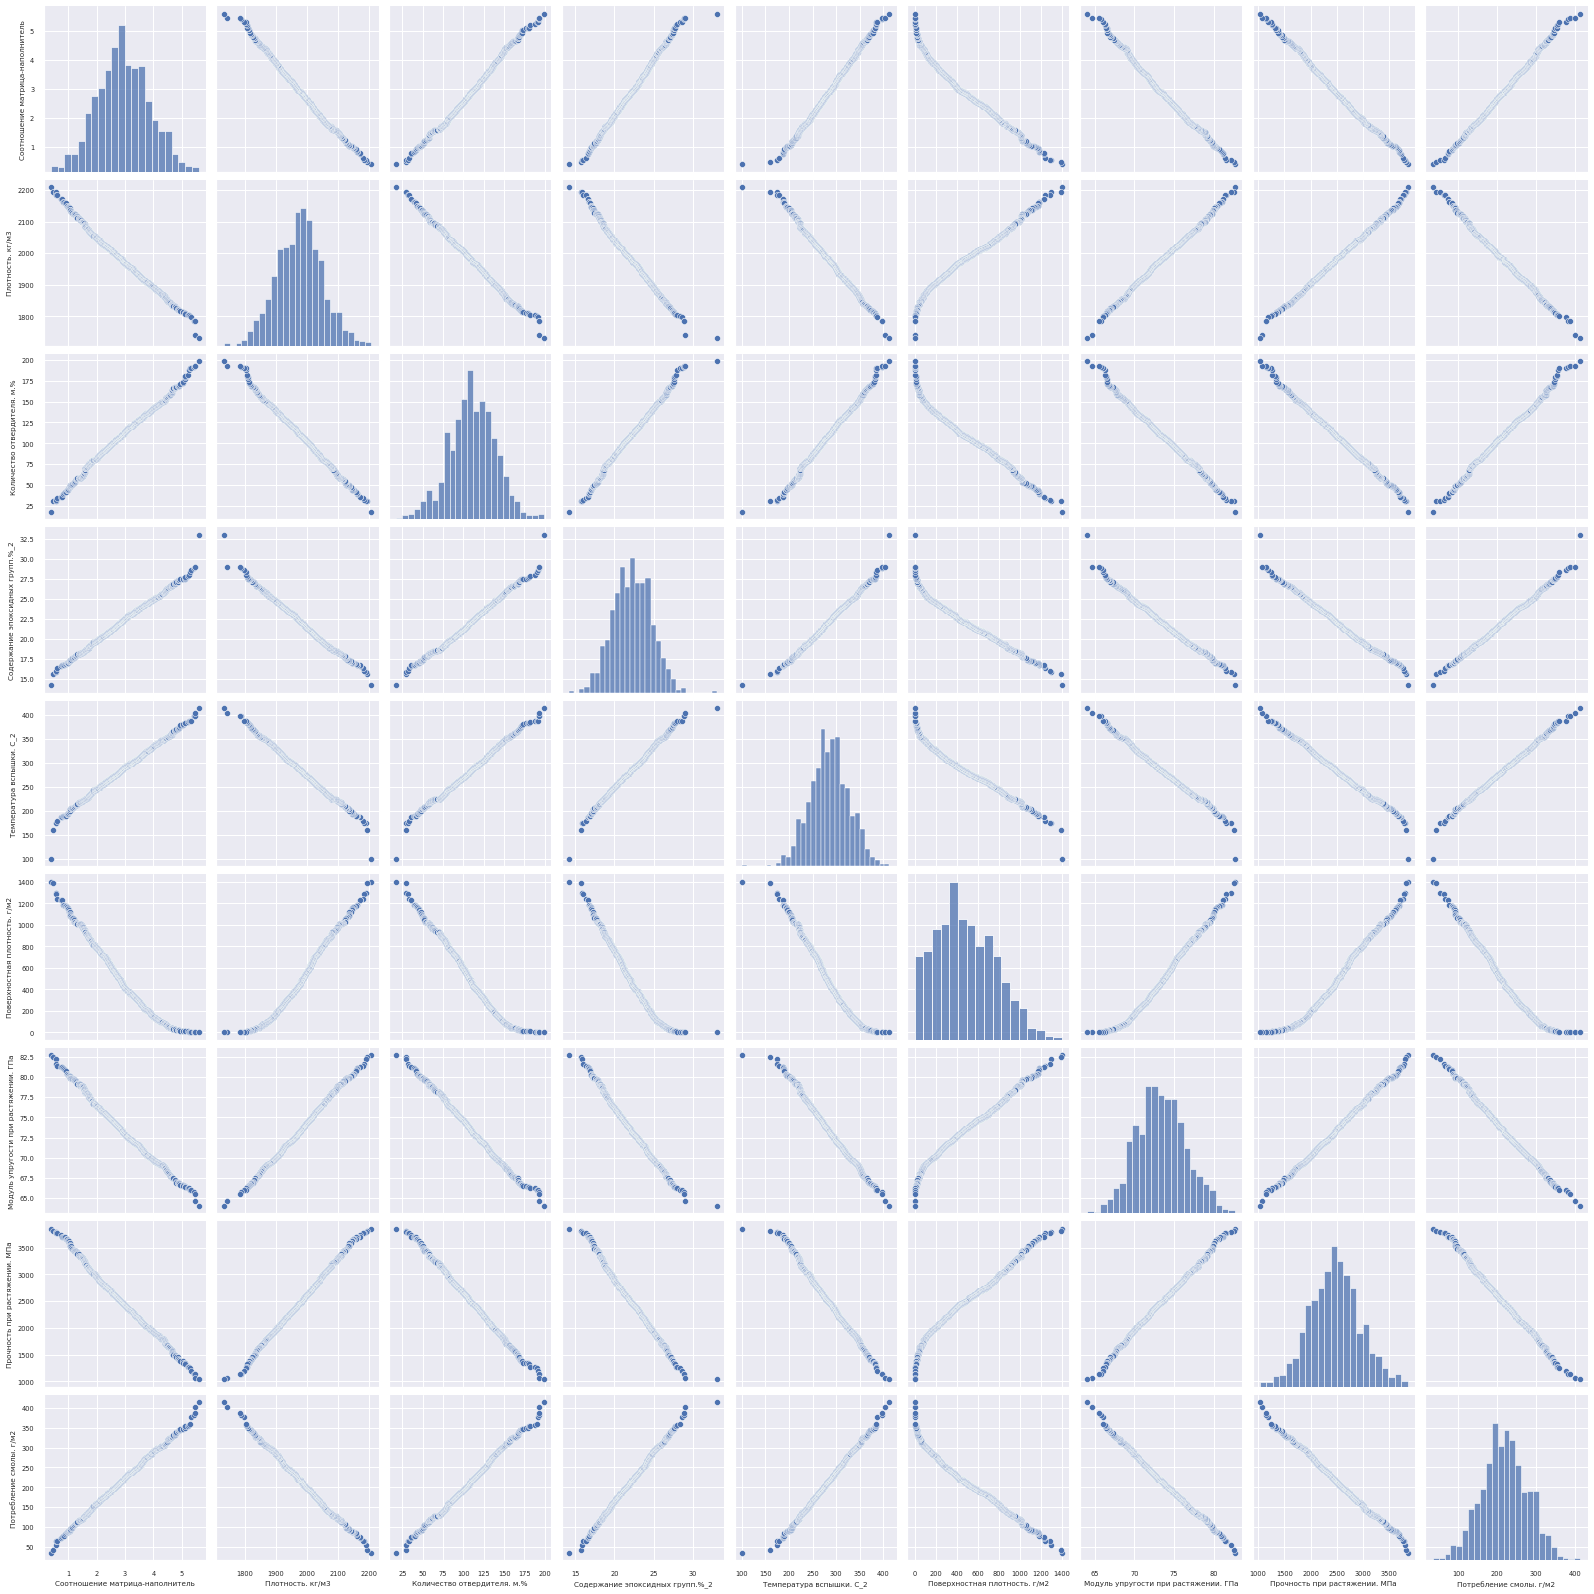

In [ ]:
sns.set(style = "darkgrid")
sns.set(font_scale=0.6)
sns.pairplot(df_sort)

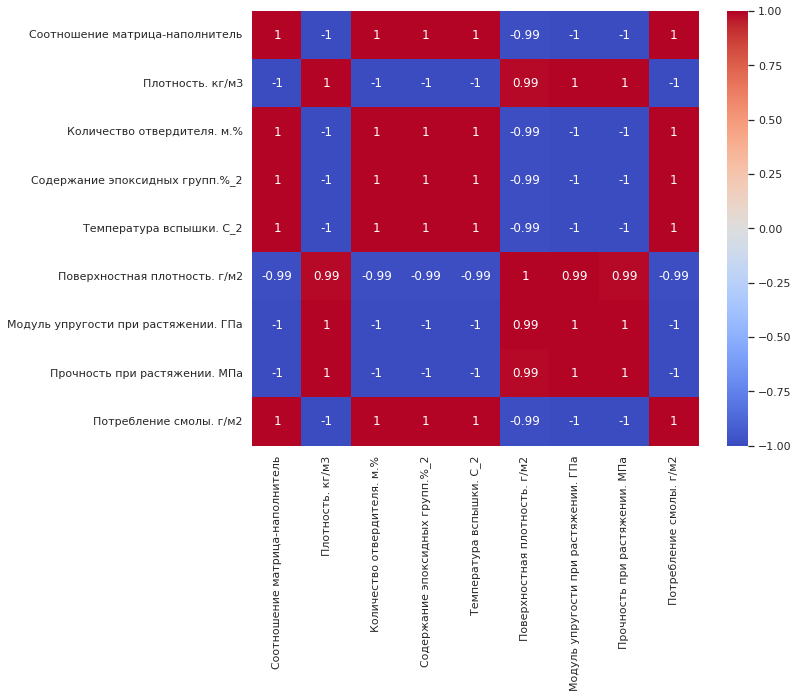

In [ ]:
sns.set(font_scale=1)
df_sort_corr = df_sort.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=df_sort_corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

Соответственно появилась явная корреляция)

С этими данными можно работать, удалять выбросы, нормализовывать, строить регрессионные модели и тд.

Далее для примера построил нейронную сеть для прогнозирования модуля упругости при растяжении.

На входе 4 параметра: **'Соотношение матрица-наполнитель', 'Количество отвердителя. м.%', 'Температура вспышки. С_2', 'Потребление смолы. г/м2'**

На выходе 1 параметр: **'Модуль упругости при растяжении. ГПа'**

In [ ]:
#нормализация (-1, 1)
from sklearn.preprocessing import MinMaxScaler
minmax_scaler_X = MinMaxScaler(feature_range=(-1, 1))
minmax_scaler_y = MinMaxScaler(feature_range=(-1, 1))
df_sort_nrm = pd.DataFrame()
df_sort_nrm[['Соотношение матрица-наполнитель', 'Количество отвердителя. м.%', 'Температура вспышки. С_2', 'Потребление смолы. г/м2']] = minmax_scaler_X.fit_transform(df_sort[['Соотношение матрица-наполнитель', 'Количество отвердителя. м.%', 'Температура вспышки. С_2', 'Потребление смолы. г/м2']])
df_sort_nrm[['Модуль упругости при растяжении. ГПа']] = minmax_scaler_y.fit_transform(df_sort[['Модуль упругости при растяжении. ГПа']])
df_sort_nrm.describe()

,Соотношение матрица-наполнитель,Количество отвердителя. м.%,Температура вспышки. С_2,Потребление смолы. г/м2,Модуль упругости при растяжении. ГПа
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,-0.023146,0.024546,0.186709,-0.030325,-0.004239
std,0.351081,0.312295,0.261390,0.313749,0.334871
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.258609,-0.175520,0.015512,-0.234090,-0.227941
50%,-0.032176,0.024481,0.186802,-0.026251,-0.010656
75%,0.216090,0.236006,0.359848,0.174821,0.213502
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = np.array(df_sort_nrm[['Соотношение матрица-наполнитель', 'Количество отвердителя. м.%', 'Температура вспышки. С_2', 'Потребление смолы. г/м2']]) # входные данные
y = np.array(df_sort_nrm[['Модуль упругости при растяжении. ГПа']])  # выходные данные


# разделение данных на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(716, 4)
(716, 1)
(307, 4)
(307, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 32)                160       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 0.0590 - mean_absolute_error: 0.1786 - val_loss: 0.0279 - val_mean_absolute_error: 0.1129
Epoch 2/100
23/23 [=======

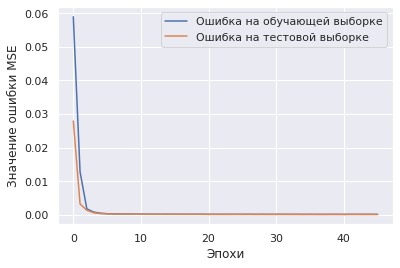

In [ ]:
# архитектура нейронной сети
model = Sequential()
model.add(Dense(4, input_dim = X_train.shape[1], activation='linear')) # входной слой
model.add(Dense(32, activation= 'relu'))
model.add(Dense(16, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()]) # компиляция
model.summary()

# Обучение нейронной сети
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks=[callback])
print(history.history.keys())

plt.plot(history.history['loss'], label = 'Ошибка на обучающей выборке')
plt.plot(history.history['val_loss'], label = 'Ошибка на тестовой выборке')
plt.xlabel('Эпохи')
plt.ylabel('Значение ошибки MSE')
plt.legend()
plt.show()

In [ ]:
res = model.predict(X)
res = minmax_scaler_y.inverse_transform(res)

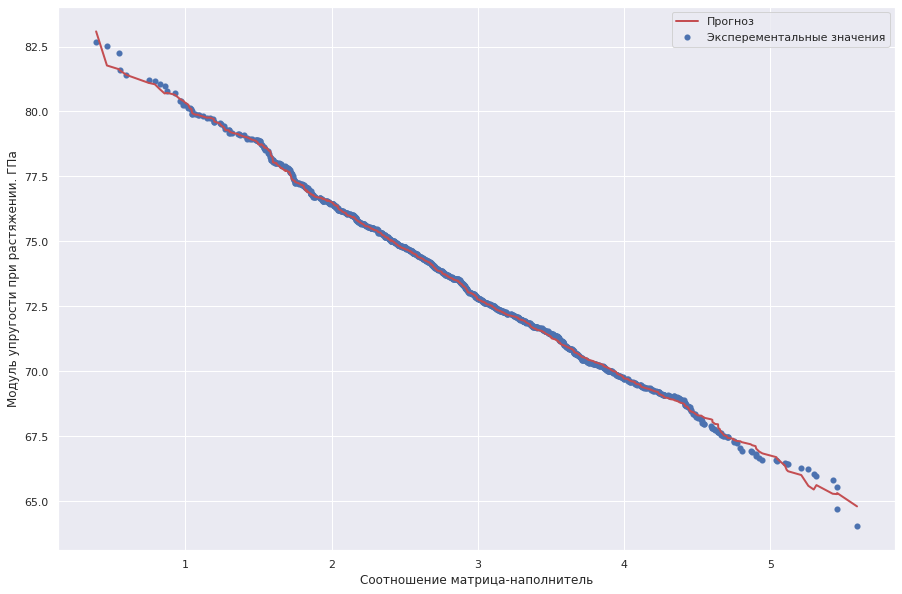

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df_sort['Соотношение матрица-наполнитель'],df_sort['Модуль упругости при растяжении. ГПа'], linewidths=0.1, label = 'Эксперементальные значения')
plt.plot(df_sort['Соотношение матрица-наполнитель'], res, 'r', linewidth=2, label = 'Прогноз')
plt.xlabel('Соотношение матрица-наполнитель')
plt.ylabel('Модуль упругости при растяжении. ГПа')
plt.legend()
plt.show()